# ロジスティック回帰 (logstic regression)

## シグモイド関数(ロジスティック関数)のプロット

シグモイド関数(ロジスティック関数)


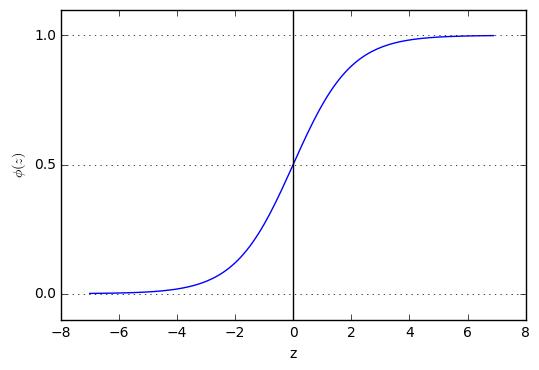

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# シグモイド関数の定義
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# 0.1間隔で-7〜7のデータを作成
z = np.arange(-7, 7, 0.1)
# 生成した範囲でのシグモイド関数を実行
phi_z = sigmoid(z)

# シグモイド関数の出力をプロット
plt.plot(z, phi_z)
plt.axvline(0.0, color='k') # 垂直線を追加(z = 0)
plt.ylim(-0.1, 1.1) # y軸の上限下限の設定
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y軸の目盛を表示
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

print('シグモイド関数(ロジスティック関数)')
plt.show()

## ロジスティック回帰の実装 (scikit-learn)

In [3]:
# Irisデータの読み込み
from sklearn import datasets
import numpy as np

# Irisデータセットをロード。人気なデータセットなので、scikit-learnに既に入っている
iris = datasets.load_iris()
# 3, 4列目の特徴量を抽出
X = iris.data[:, [2, 3]]
# 正解ラベルを取得
y = iris.target

In [4]:
# データセットの分割
from sklearn.cross_validation import train_test_split
# トレーニングデータとテストデータに分割
# 70%をトレーニングセット、30%をテストセットとしてランダムに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
# 特徴量のスケーリング
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)
# 計算した平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
# ロジスティック回帰でトレーニング
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [7]:
# 決定境界をプロットするメソッドの定義
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 2次元のデータセットの決定境界(Decision Regions)をプロットする
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                                              np.arange(x2_min, x2_max, resolution))

    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 元のグリッドポイントのデータサイズに戻す
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

    # テストセットを目立たせる
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', alpha=1.0, linewidths=1, marker='o', s=55, label='test set')

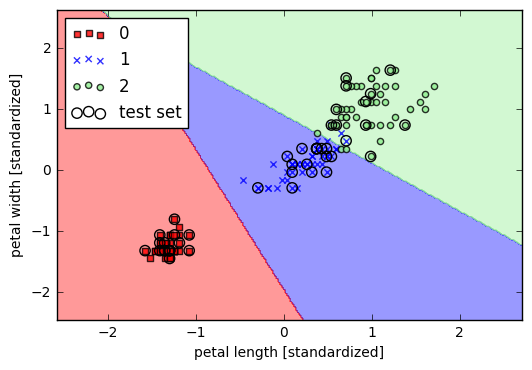

In [9]:
# トレーニングデータとテストデータを行方向に結合
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# 決定境界のプロット
plot_decision_regions(X=X_combined_std, y=y_combined,
                                        classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [22]:
# サンプルの所属関係の確率を予測する
#X_test_std[0, :].reshape(-1, 1)
lr.predict_proba(X_test_std[0, :])

/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])